In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
q1 = pd.read_csv('/Users/Jun/tweets-covid19-eda/dataset/raw/subset_labeled/Q1_20221002.csv', encoding='utf-8')
q2 = pd.read_csv('/Users/Jun/tweets-covid19-eda/dataset/raw/subset_labeled/Q2_20221002.csv', encoding='utf-8')

Q1 Overview

In [3]:
# Filtering tweets based on the type of coding team (two-person or three-person)
two_person_coding = q1[q1['coding team'] == 'two-person']
three_person_coding = q1[q1['coding team'] == 'three-person']

# For two-person teams, 
two_person_agreement = (two_person_coding['coder 1 or 3'] == two_person_coding['coder 2 or 4']).value_counts(normalize=True)

# For three-person teams, 
three_person_agreement = three_person_coding.apply(lambda x: (x['coder 1 or 3'] == x['coder 2 or 4']) and (x['coder 2 or 4'] == x['coder 5']), axis=1).value_counts(normalize=True)

# Calculating the proportion of two-person vs. three-person in the coding team column
coding_team_proportion = q1['coding team'].value_counts(normalize=True)



two_person_agreement, three_person_agreement, coding_team_proportion


(True     0.903992
 False    0.096008
 Name: proportion, dtype: float64,
 True     0.891588
 False    0.108412
 Name: proportion, dtype: float64,
 coding team
 two-person      0.534514
 three-person    0.465486
 Name: proportion, dtype: float64)

In [4]:
# Calculating the Yes and No portion for two-person coding team
two_person_yes_no = two_person_coding[two_person_coding['coder 1 or 3'] == two_person_coding['coder 2 or 4']]['coder 1 or 3'].value_counts()

# Calculating the Yes and No portion for three-person coding team
three_person_agreed_tweets = three_person_coding[(three_person_coding['coder 1 or 3'] == three_person_coding['coder 2 or 4']) & (three_person_coding['coder 2 or 4'] == three_person_coding['coder 5'])]
three_person_yes_no = three_person_agreed_tweets['coder 1 or 3'].value_counts()

# Calculating the total proportion of "Yes" and "No"
total_yes = two_person_yes_no['1-YES'] + three_person_yes_no['1-YES']
total_no = two_person_yes_no['0-NO'] + three_person_yes_no['0-NO']
total_proportion = pd.Series([total_yes, total_no], index=['Yes', 'No']) / (total_yes + total_no)


total_proportion

Yes    0.613137
No     0.386863
dtype: float64

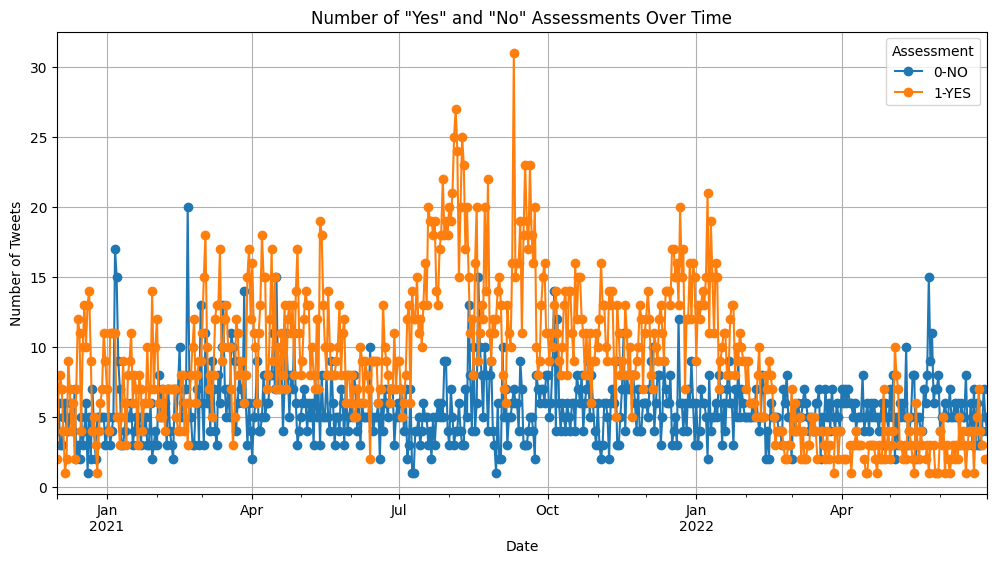

In [5]:
# Analyzing how "Yes" and "No" change with time
combined_agreed_tweets = pd.concat([two_person_coding[two_person_coding['coder 1 or 3'] == two_person_coding['coder 2 or 4']],
                                    three_person_agreed_tweets])
combined_agreed_tweets['created_at'] = pd.to_datetime(combined_agreed_tweets['created_at']) # Parsing the 'created_at' column to datetime
yes_no_per_day = combined_agreed_tweets.groupby([pd.Grouper(key='created_at', freq='D'), 'coder 1 or 3']).size().unstack()
yes_no_per_day.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Number of "Yes" and "No" Assessments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Assessment')
plt.grid(True)
plt.show()

In [6]:
yes_no_per_month = combined_agreed_tweets.groupby([pd.Grouper(key='created_at', freq='M'), 'coder 1 or 3']).size().unstack()

yes_no_per_month

coder 1 or 3,0-NO,1-YES
created_at,,
2020-12-31 00:00:00+00:00,131,212
2021-01-31 00:00:00+00:00,161,228
2021-02-28 00:00:00+00:00,175,191
2021-03-31 00:00:00+00:00,215,322
2021-04-30 00:00:00+00:00,207,345
2021-05-31 00:00:00+00:00,171,322
2021-06-30 00:00:00+00:00,165,231
2021-07-31 00:00:00+00:00,145,428
2021-08-31 00:00:00+00:00,190,508


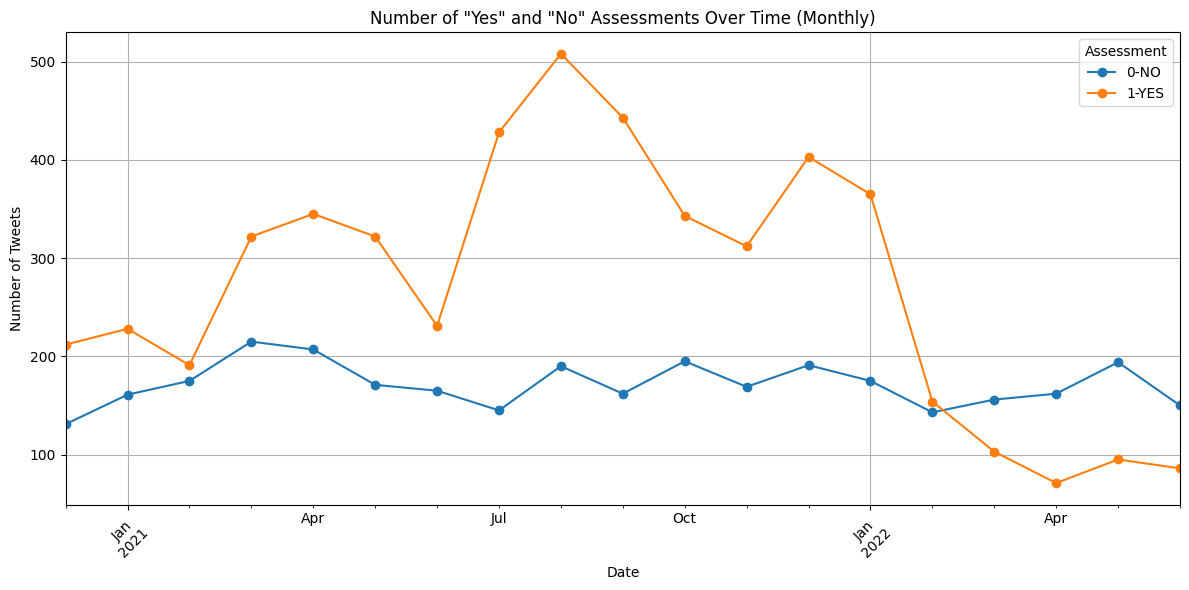

In [7]:
yes_no_per_month.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Number of "Yes" and "No" Assessments Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Assessment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q2 Overview

In [9]:
# Showing unique coding teams
unique_coding_teams = q2['coding team'].unique()

unique_coding_teams

array(['Meisi and Jessica', 'Yiting, Yilin, and Ella', 'Yiting and Ella',
       'Meisi, Hina, and Veronica', 'Ella and Zhixuan'], dtype=object)

In [11]:
# Filtering of tweets based on the type of coding team
two_person_coding2 = q2[q2['coding team'].isin(['Meisi and Jessica', 'Yiting and Ella', 'Ella and Zhixuan'])]
three_person_coding2 = q2[q2['coding team'].isin(['Yiting, Yilin, and Ella', 'Meisi, Hina, and Veronica'])]

# For two-person teams, 
two_person_agreement2 = (two_person_coding2['coder 1/3'] == two_person_coding2['coder 2/4']).value_counts(normalize=True)

# For three-person teams, 
three_person_agreement2 = three_person_coding2.apply(lambda x: (x['coder 1/3'] == x['coder 2/4']) and (x['coder 2/4'] == x['coder 5']), axis=1).value_counts(normalize=True)

# Calculating the proportion of two-person vs. three-person in the coding team column
coding_team_proportion2 = q2['coding team'].value_counts(normalize=True)



two_person_agreement2, three_person_agreement2, coding_team_proportion2

(False    0.591417
 True     0.408583
 Name: proportion, dtype: float64,
 False    0.668347
 True     0.331653
 Name: proportion, dtype: float64,
 coding team
 Meisi, Hina, and Veronica    0.322309
 Ella and Zhixuan             0.322202
 Meisi and Jessica            0.177745
 Yiting, Yilin, and Ella      0.143177
 Yiting and Ella              0.034567
 Name: proportion, dtype: float64)

In [13]:
# For two-person teams, 
two_person_agreed_coding2 = two_person_coding2[two_person_coding2['coder 1/3'] == two_person_coding2['coder 2/4']]
two_person_stance_counts = two_person_agreed_coding2['coder 1/3'].value_counts()

# For three-person teams, 
three_person_agreed_coding2 = three_person_coding2[(three_person_coding2['coder 1/3'] == three_person_coding2['coder 2/4']) & (three_person_coding2['coder 2/4'] == three_person_coding2['coder 5'])]
three_person_stance_counts = three_person_agreed_coding2['coder 1/3'].value_counts()

# Combining the stance counts from both two-person and three-person teams
total_stance_counts = two_person_stance_counts.add(three_person_stance_counts, fill_value=0)
total_stance_proportions = total_stance_counts / total_stance_counts.sum()



total_stance_counts, total_stance_proportions

(coder 1/3
 1-POSITIVE              2036
 2-NEGATIVE              1132
 0-NEUTRAL or UNCLEAR     326
 Name: count, dtype: int64,
 coder 1/3
 1-POSITIVE              0.582713
 2-NEGATIVE              0.323984
 0-NEUTRAL or UNCLEAR    0.093303
 Name: count, dtype: float64)

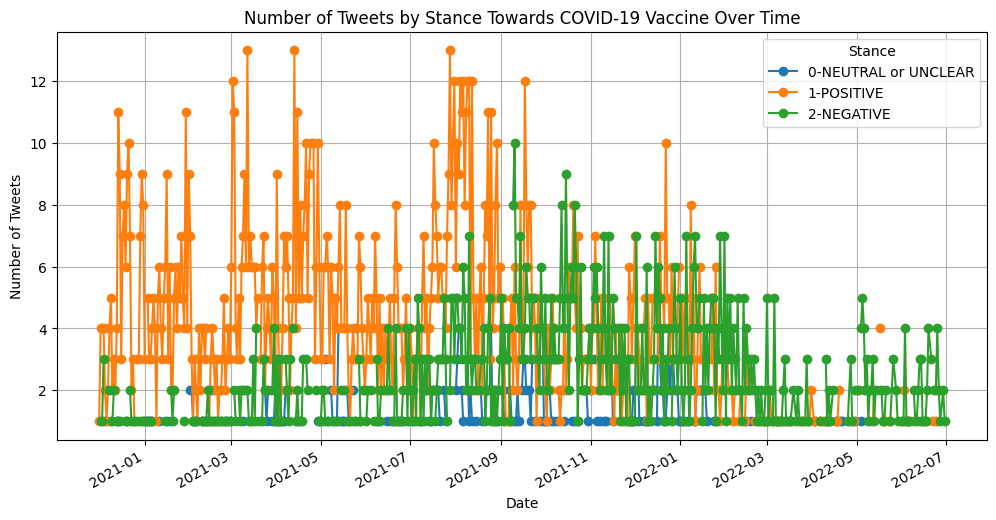

In [14]:
# Plotting the number of tweets by stance over time
combined_agreed_coding2 = pd.concat([two_person_agreed_coding2, three_person_agreed_coding2])
combined_agreed_coding2['created_at'] = pd.to_datetime(combined_agreed_coding2['created_at']) # Parsing the 'created_at' column to datetime
stance_counts_per_day = combined_agreed_coding2.groupby([pd.Grouper(key='created_at', freq='D'), 'coder 1/3']).size().unstack()
stance_counts_per_day.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Number of Tweets by Stance Towards COVID-19 Vaccine Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Stance')
plt.grid(True)
plt.show()

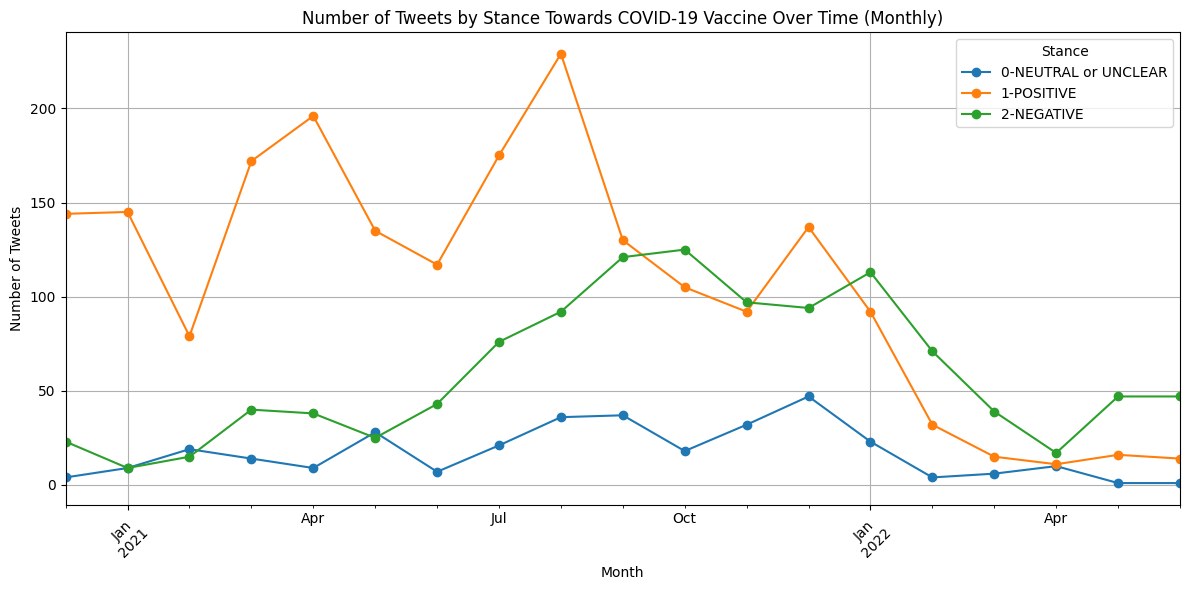

In [15]:
stance_counts_per_month = combined_agreed_coding2.groupby([pd.Grouper(key='created_at', freq='M'), 'coder 1/3']).size().unstack()
plt.figure(figsize=(12, 6))
stance_counts_per_month.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of Tweets by Stance Towards COVID-19 Vaccine Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(title='Stance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

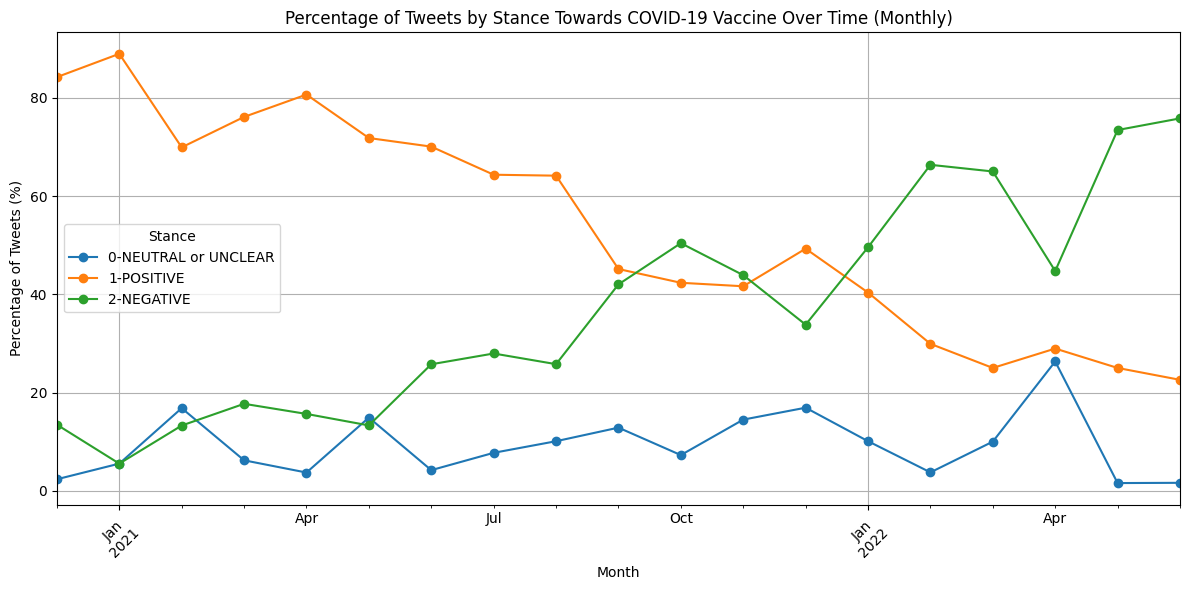

In [16]:
stance_percentages_per_month = stance_counts_per_month.div(stance_counts_per_month.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
stance_percentages_per_month.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Percentage of Tweets by Stance Towards COVID-19 Vaccine Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Percentage of Tweets (%)')
plt.legend(title='Stance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig('small_set_percentage_change.png', dpi=300) 
plt.show()

Why negative stances increased from 2021-07?

On May 4, 2021, Biden announced a new goal of having 70 percent of all adults in the U.S. receive at least one COVID-19 vaccine shot by July 4, along with steps to vaccinate teenagers and more inaccessible populations.

On May 13, the CDC changed its guidance and said that fully vaccinated individuals do not need to wear masks in most situations.[142] Some states ended their mask mandates shortly after, while others maintained the mandate. The CDC was criticized for the confusion resulting from the announcement, as it did not remove existing state and local mandates.
-- Lack of trust in the government?

By June, COVID-19 cases rose again.
-- The vaccination did not show clear help at that time?

rescource from https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States